## 4. Preparing to use image services...


In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import requests, io, astropy
from IPython.display import Image, display

## For handling ordinary astropy Tables
from astropy.table import Table, vstack

## For reading FITS files
import astropy.io.fits as apfits

## There are a number of relatively unimportant warnings that 
## show up, so for now, suppress them:
import warnings
warnings.filterwarnings("ignore")

## our stuff
import sys
# Use the NASA_NAVO/astroquery
from navo_utils.cone import Cone
from navo_utils.registry import Registry
from navo_utils.registry import display_results
from navo_utils.image import Image
from navo_utils import utils
import astroquery

First we need to know what registry services have the image data that we want. The Registry query function is useful here for picking out the "image" (SIA) service. Here, we query the registry and output a list of the MAST data archives that contain ultraviolet wavelength data. However, you can easily select optical infrared, or any other wavelengths by modifying the "waveband" parameter or select irsa, heasarc, or leave the "source" field blank if you want other data archives. 

If you know the access_url for your data, you can skip this step. Or further in the notebook we have an example that gets all the images for ALL the services. 

In [2]:
results=Registry.query(service_type="image",waveband="uv", source="mast")
print('Found {} results:'.format(len(results)))

print(results.columns)
ivoid=results[:]['ivoid']
url=results[:]['access_url']
#
# For visual reference:
for i in range(len(url)):
    print(i, ':', ivoid[i], '; ', url[i])

Found 12 results:
<TableColumns names=('waveband','short_name','ivoid','res_description','access_url','reference_url','publisher','service_type')>
0 : ivo://irsa.ipac/mast/scrapbook ;  https://irsa.ipac.caltech.edu/cgi-bin/Atlas/nph-atlas?mission=Scrapbook&amp;hdr_location=%5CScrapbookDataPath%5C&amp;collection_desc=The+MAST+Image%2FSpectra+Scrapbook+%28Scrapbook%29&amp;SIAP_ACTIVE=1&amp;
1 : ivo://mast.stsci/candels ;  http://archive.stsci.edu/siap/search.php?id=candels&amp;
2 : ivo://mast.stsci/siap/hst.maoz_atlas ;  http://archive.stsci.edu/siap/search.php?id=maoz_atlas&amp;
3 : ivo://mast.stsci/siap/uit ;  http://archive.stsci.edu/siap/search.php?id=UIT&amp;
4 : ivo://mast.stsci/stpr ;  http://archive.stsci.edu/stpr/vo_search.php?
5 : ivo://mast.stsci/siap/galex_atlas ;  http://archive.stsci.edu/siap/search.php?id=galex_atlas&amp;
6 : ivo://mast.stsci/siap/udfuv ;  http://archive.stsci.edu/siap/search.php?id=udfuv&amp;
7 : ivo://mast.stsci/phat ;  http://archive.stsci.edu/siap/sear

## 5 SIA

We find the relevant image data within catalogs containing image data. 

### 5.1 Using a specific data catalog to search for image data for a source
Once you find which data archive contains data that you are interested in, you can find available image data from an SIA service using the access_url. 

For example, say that we know the CANDELS data is best for our purpose. This corresponds to the number 1. Here we show how you get a table with information about images within this data catalog for sources within 5 arcsec of the given ra,dec position. 

In [3]:
im_info=Image.query(coords='189.22917,62.23830', inradius='.001', services=results[1])

Found 1 services to query.
    Querying service http://archive.stsci.edu/siap/search.php?id=candels&
    Got 6 results for source number 0


### 5.2 Searching for image data for a given source in all available catalogs
Perhaps you don't know which catalog has the image that you want, so you get a table list for all images that contain your given source. 

The Image class was constructed to do this for you. The example below shows how to do this for all the services, still setting the waveband and data source fields, which one can easily modify to suit their specific example. 


In [4]:
im_info=Image.query(coords=['189.22917,62.23830'], inradius='.001', waveband='uv', source='mast', max_services=20)

Found 12 services to query.
    Querying service https://irsa.ipac.caltech.edu/cgi-bin/Atlas/nph-atlas?mission=Scrapbook&hdr_location=%5CScrapbookDataPath%5C&collection_desc=The+MAST+Image%2FSpectra+Scrapbook+%28Scrapbook%29&SIAP_ACTIVE=1&
    Got 240 results for source number 0
    Querying service http://archive.stsci.edu/siap/search.php?id=candels&
    Got 6 results for source number 0
    Querying service http://archive.stsci.edu/siap/search.php?id=maoz_atlas&
    (Got no results for source number 0)
    Querying service http://archive.stsci.edu/siap/search.php?id=UIT&
    (Got no results for source number 0)
    Querying service http://archive.stsci.edu/stpr/vo_search.php?
    (Got no results for source number 0)
    Querying service http://archive.stsci.edu/siap/search.php?id=galex_atlas&
    (Got no results for source number 0)
    Querying service http://archive.stsci.edu/siap/search.php?id=udfuv&
    (Got no results for source number 0)
    Querying service http://archive.stsc

## 6 Querying a list of sources

We want to be able to give a list of sources and get back something useful  for matches/non-matches. The image query function can also handle lists of coordinates.   <font color='red'>[SHOW EXAMPLE HERE]</font> 

In [5]:
#from astropy.io import ascii
#gal_coords = ascii.read('interacting_gals.csv', delimiter=',') 

### Ack. Having trouble with object handling here to format properly into tuples for Image.query.
#ra=(gal_coords[0:3]['ra'])
#dec=(gal_coords[0:3]['dec'])
#cc=['9.907, 8.965', '19.0186, 46.7304', '20.2887, 40.4703'] ### THIS WORKS, but want to learn how to do without brute force
#im_info=Image.query(coords=cc, inradius='.005', waveband='uv', max_services=100)


## 7. Retrieving images

You can look at the images_info and pick one to download:

    Image.get( im_input, filename='my_file.fits')
    
im_input is the im_info from above selected by service, source, and row indices like this:

    im_input=im_info[id_service][id_source][row_#]

or get the image data to hand to the plotter:

    image=Image.get( im_input )
    plt.imshow( image,  cmap='gray', origin='lower',vmax=0.02 )
    
where it downloads it to filename if specified, or to a temporary filename if not and then reads it in and returns the image data if not.

Or hand a list and return a list of images:
    
    im_inputs=im_info[][][:] 

selects all rows or you can select a subset

    images=Image.get(im_inputs )
    plt.imshow( images[0],  cmap='gray', origin='lower',vmax=0.02 )
    
<font color='red'>[Working on this...]</font> 

In [6]:
im_input=im_info[0][0][1]
col = utils.find_column_by_ucd(im_input, 'VOX:Image_AccessReference')
print(col[1])

https://archive.stsci.edu/cgi-bin/hst_preview_search?imfmt=fits&name=U8ITW701M


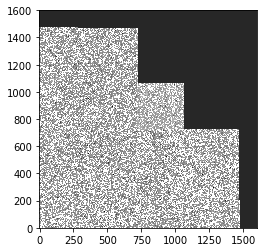

In [11]:
### NEXT EXAMPLE-- 
#im_input=im_info[1][0]
### Note: this is a 1.6GB file... it will take SERIOUS time to download and image
### We need to add some outputs so that file size or download time is provided
### Having tried a few options... the im_info output seems too non-standard. How can we give im_info and get the urls for image files consistently and in user-friendly way?

### Testing... 
im_input=im_info[0][0]
image=Image.get(im_input, row_ind=5)
import matplotlib as mpl
plt.imshow(image, cmap='gray', origin='lower', norm=mpl.colors.LogNorm())

# Ok-- this would look better zoomed in, etc... so something for later. 


In [8]:
#This will download the file to the internal directory
Image.get(im_input, filename='Image.fits')


Downloaded file. Saved as test.fits


In [12]:
# Working on list example...  NOT WORKING AT MOMENT... 
